# 01 Business Understanding

## Overview
The data has been split into two groups:

training set (train.csv)

test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Data Dictionary

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | 
| sex | Sex |	
| Age | Age in years |	
| sibsp| # of siblings / spouses aboard the Titanic |	
| parch | # of parents / children aboard the Titanic|
| ticket | Ticket number	|
| fare | Passenger fare |	
|cabin | Cabin number |	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## Variable Notes
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# 02 Data Minig

In [232]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
titanic = pd.read_csv('titanic.csv')

In [234]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 03 Data Cleaning

In [235]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [236]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [237]:
# Age Have Null Data
# Show Distribution

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

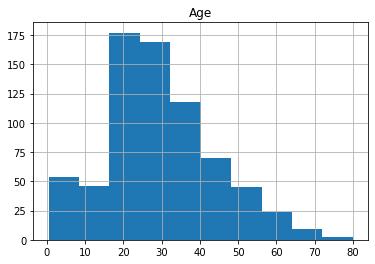

In [238]:
titanic.hist(['Age'])

In [239]:
median = titanic['Age'].median()

In [240]:
median

28.0

In [241]:
titanic['Age'].fillna(median,inplace=True) # Question #TIPS

In [242]:
mode=titanic['Embarked'].mode 

In [243]:
titanic['Embarked'].fillna('S',inplace=True)

In [244]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# 04 Exploratory Data Analysis and visualizations.¶

### Exploratory Data Analysis

In [245]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


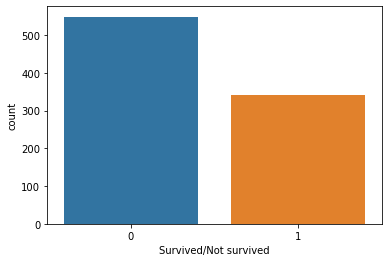

In [246]:
sns.countplot('Survived',data=titanic)
plt.xlabel('Survived/Not survived')
plt.show()

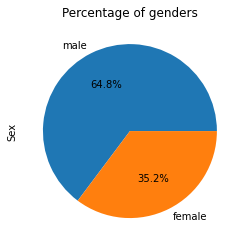

In [247]:
titanic['Sex'].value_counts().plot(kind='pie',
                                  title='Percentage of genders',
                                  autopct='%1.1f%%')
plt.show()

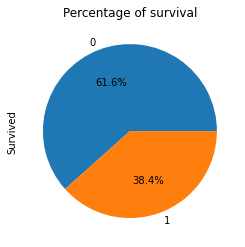

In [248]:
titanic.Survived.value_counts().plot(kind='pie',
                                  title='Percentage of survival',
                                  autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

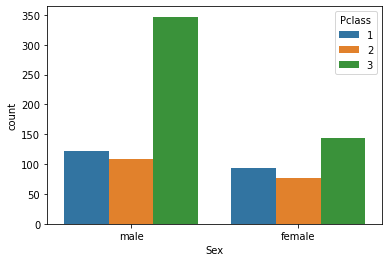

In [249]:
sns.countplot(x='Sex', hue='Pclass', data=titanic)

First, familiarize yourself with the data. In the following, we see that 61.6% of the passengers died after the crash with the iceberg. Also, in the boat, there were more males than females, and especially males belonging to 3rd clas

C:\Users\laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


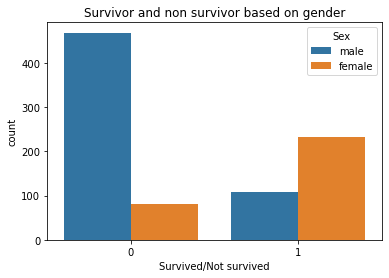

In [250]:
sns.countplot('Survived',hue='Sex',data=titanic)
plt.xlabel('Survived/Not survived')
plt.title('Survivor and non survivor based on gender')
plt.show()

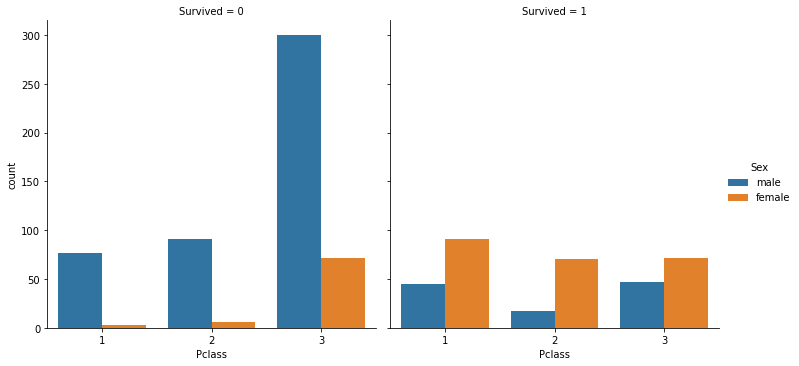

In [251]:
sns.catplot(x='Pclass',hue='Sex',col='Survived',kind='count',data=titanic)

#### Finally, the factor plot below comprises information about these three features.

If you were a female belonging to the 1st class, then you would survive.

In the second class the percentage decreases but it is still high

If you are a female in the 3rd class, then your probabilities of surviving had decreased considerably, but still higher compared with males.

###### AGE

C:\Users\laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

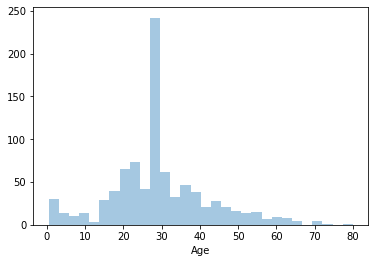

In [252]:
sns.distplot(titanic['Age'].dropna(),kde=False)

<AxesSubplot:xlabel='count', ylabel='Age'>

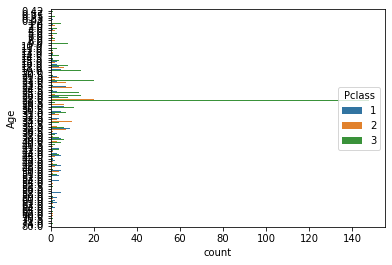

In [253]:
sns.countplot(y='Age', hue='Pclass', data=titanic)
### Very Bad

C:\Users\laptop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

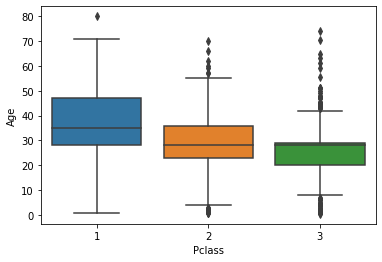

In [254]:
sns.boxplot('Pclass','Age',data=titanic)

# 05 Feature Engineering

In [255]:
Embar={'S':0,'C':1, 'Q':2}
titanic['Embarked']=[Embar[x] for x in titanic['Embarked']]

In [256]:
sex={'male':0,'female':1}
titanic['Sex'] = [sex[x] for x in titanic['Sex']]

<AxesSubplot:>

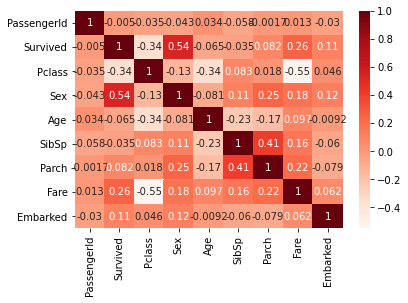

In [259]:
sns.heatmap(titanic.corr(), annot=True,cmap='Reds')

In [257]:
pd.DataFrame([titanic.corr()['Survived'].sort_values()])

,Pclass,Age,SibSp,PassengerId,Parch,Embarked,Fare,Sex,Survived
Survived,-0.338481,-0.06491,-0.035322,-0.005007,0.081629,0.106811,0.257307,0.543351,1.0


In [260]:
y = titanic['Survived']

In [261]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [262]:
x = titanic.drop(['Cabin','PassengerId','Name','Survived','Ticket'],axis=1)

## 06 & 07 Bulid Model & Evalution

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 

In [267]:
X_train , X_test ,y_train , y_test = train_test_split(
                                             x, y
                                            ,test_size=0.2
                                            ,random_state=42)

### LogisticRegression

In [270]:
Logistic_model = LogisticRegression(max_iter=4000)
Logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [271]:
y_log = Logistic_model.predict(X_test)

In [272]:
accuracy_score(y_test, y_log)

0.7988826815642458

### Decision Tree

In [279]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,2


In [280]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [281]:
y_tree = tree_clf.predict(X_test)

In [282]:
accuracy_score(y_test, y_tree)

0.7988826815642458

In [283]:
from matplotlib import pyplot as plt
from sklearn import tree

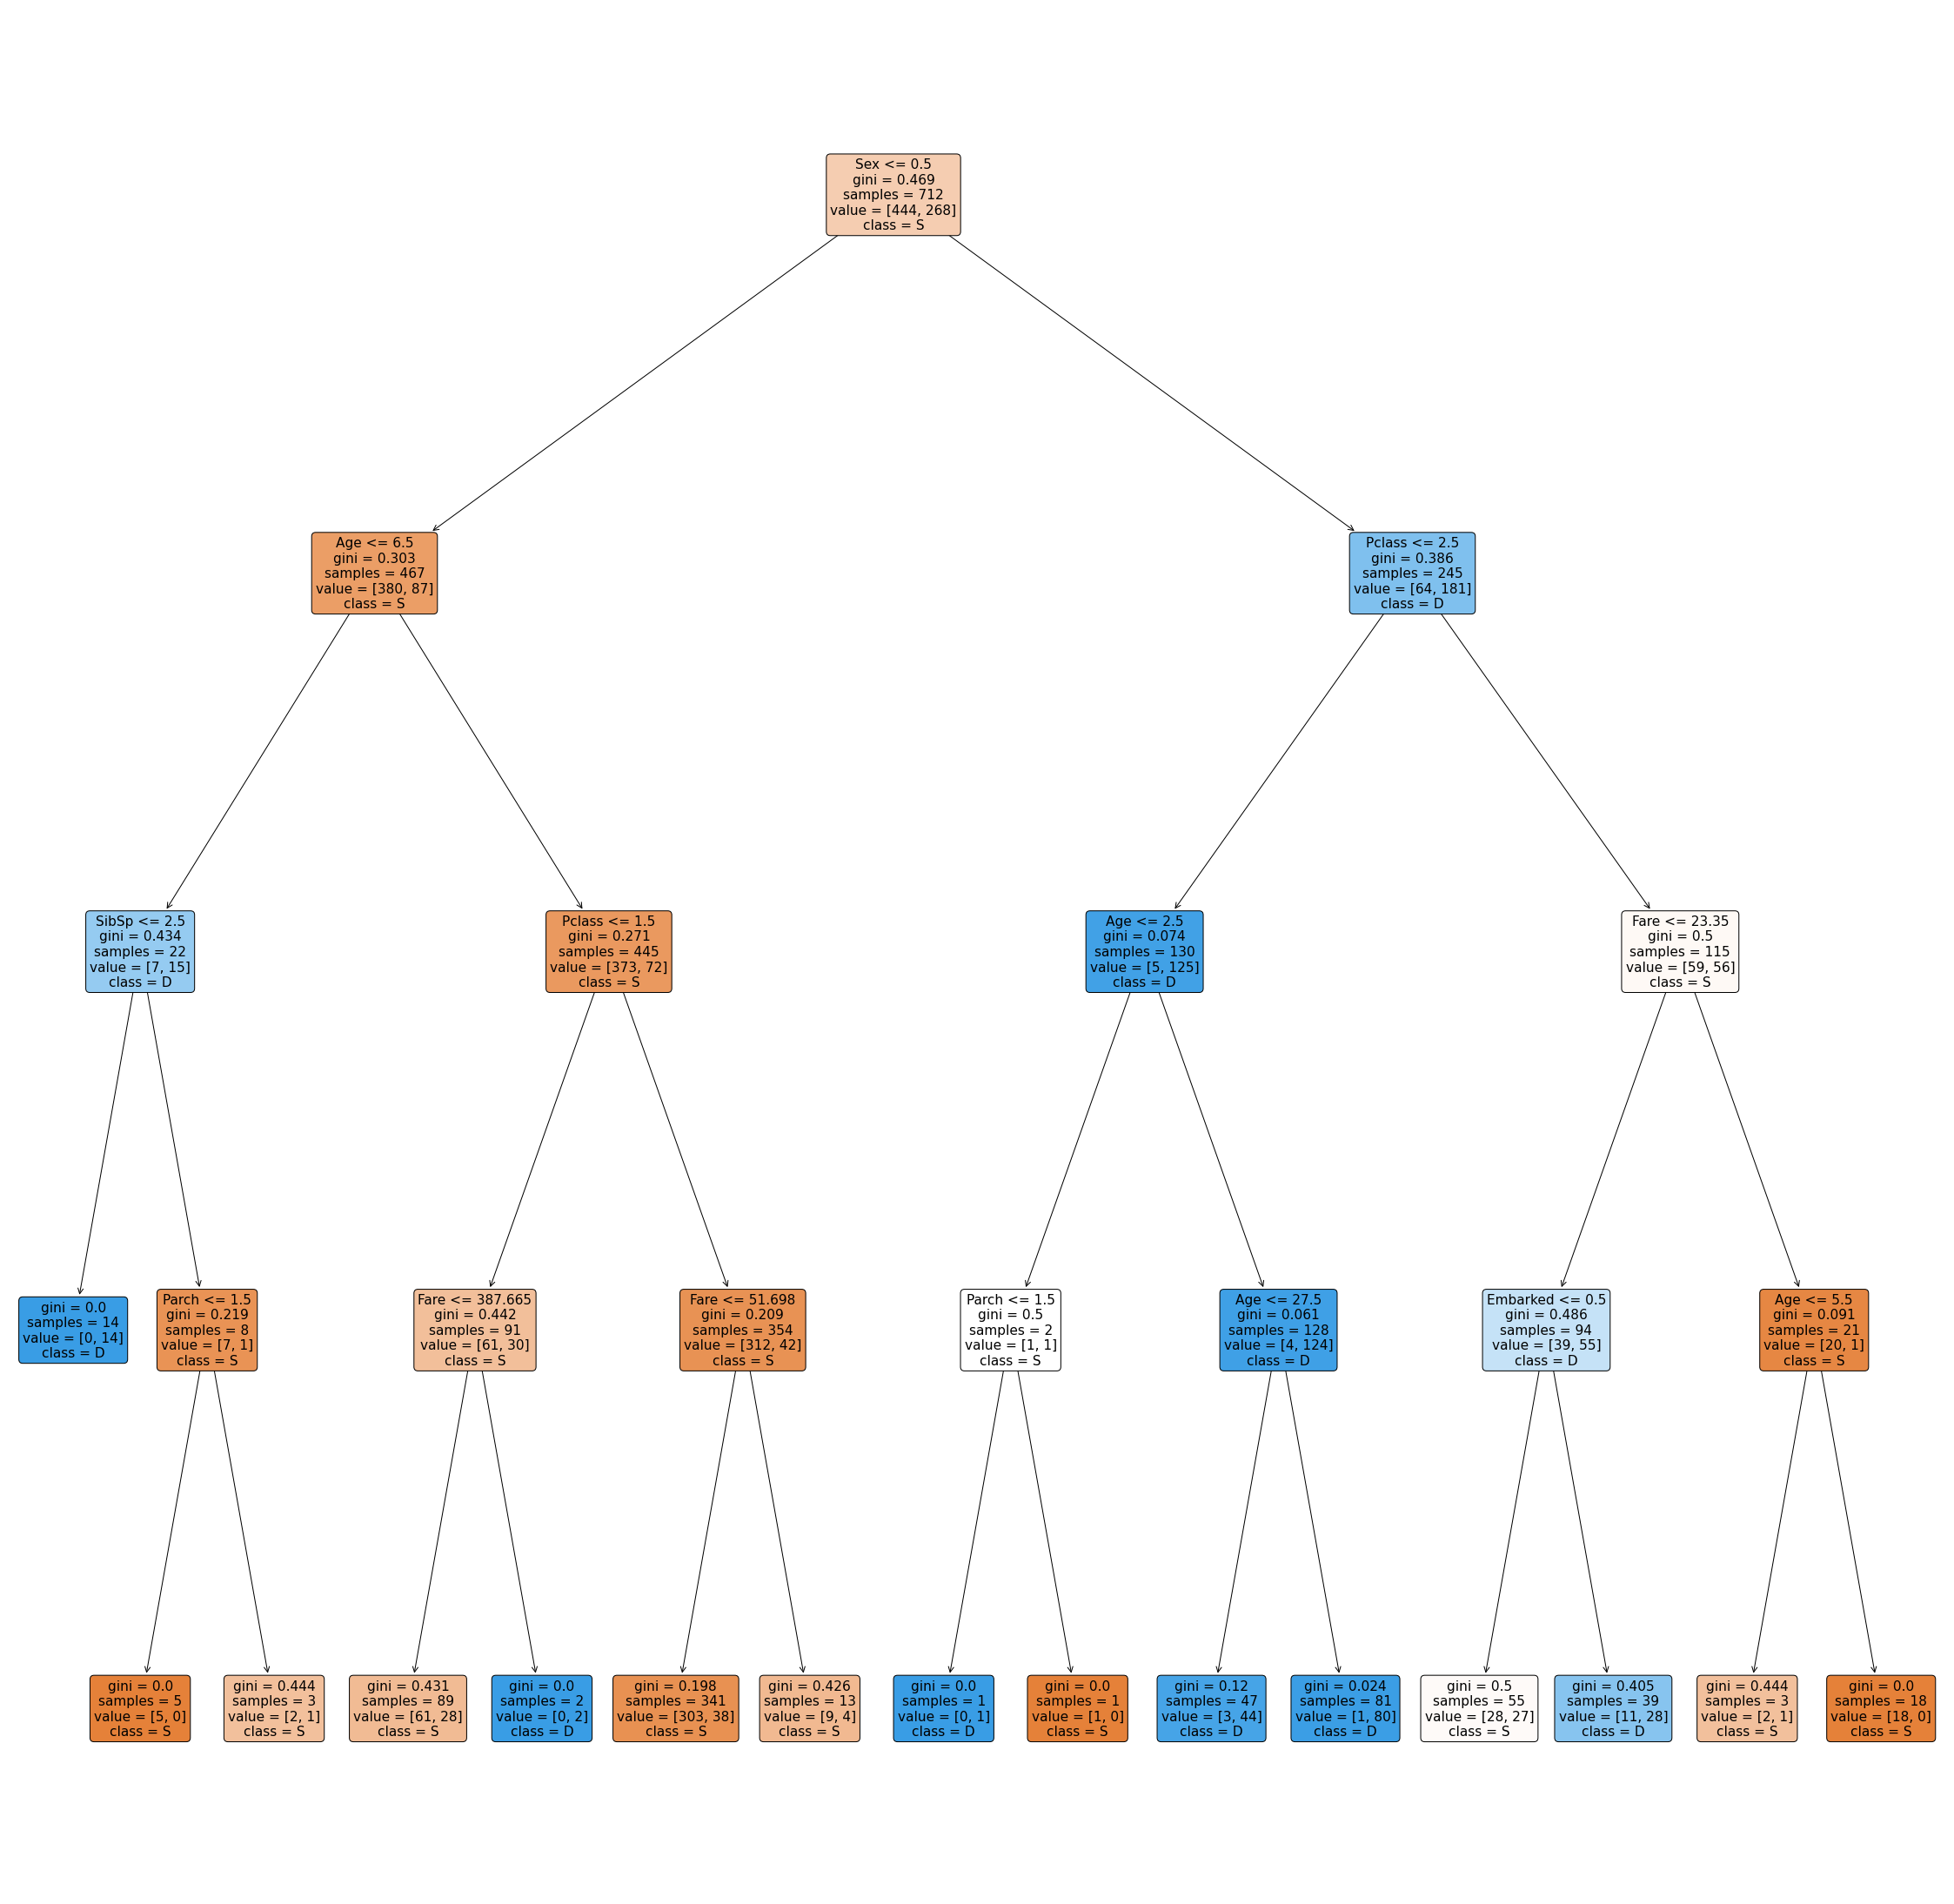

In [284]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(tree_clf, 
                   feature_names=feature,  
                   class_names=['S','D'],
                   rounded=True,
                   filled=True)

### RandomForestClassifier

In [285]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
rnd_clf = RandomForestClassifier(n_estimators=1000,
                                 max_depth= 5,
                                 random_state=42)

In [287]:
rnd_clf .fit(X_train , y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42)

In [288]:
y_pred_rnd = rnd_clf.predict(X_test)

In [289]:
accuracy_score (y_pred_rnd, y_test)

0.8156424581005587

### Save & Load Model

In [200]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rnd_clf, open(filename, 'wb'))

In [201]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8202247191011236
